In [1]:
import pandas as pd

For this data the flow rate / river conditions can be assumed to be constant.

Could do a 'perceptron' type model fitting method - very little data but - what could be done is loop through all data points, have internal model weightings and update for each data point.

In [11]:
df = pd.read_csv('Test Data/testData.csv')
df.head(20)

,Position,Estimated horizontal offset,Estimated vertical offset,Output power,Period for 10 rotation,Period for 1 rotation,Turbine rotational speed,Turbine rotational speed.1,Generator rotational speed
0,A,0.65,0.14,0.366,41.52,4.152,0.241,14.5,231.2
1,B,0.65,0.02,0.391,40.62,4.062,0.246,14.8,236.3
2,C,0.73,0.04,0.393,40.37,4.037,0.248,14.9,237.8
3,D,0.73,0.12,0.299,41.89,4.189,0.239,14.3,229.2
4,E,0.69,-0.10,0.471,38.46,3.846,0.260,15.6,249.6
5,F,0.88,-0.13,0.505,37.15,3.715,0.269,16.2,258.4
6,G,0.98,-0.45,0.638,34.54,3.454,0.290,17.4,277.9
7,H,1.12,-0.50,0.768,28.60,2.860,0.350,21.0,335.7
8,I,1.24,-0.54,0.772,28.71,2.871,0.348,20.9,334.4
9,J,0.89,-0.18,0.548,35.97,3.597,0.278,16.7,266.9



The max RPM is  335.7

The min RPM is  229.2


<AxesSubplot: >

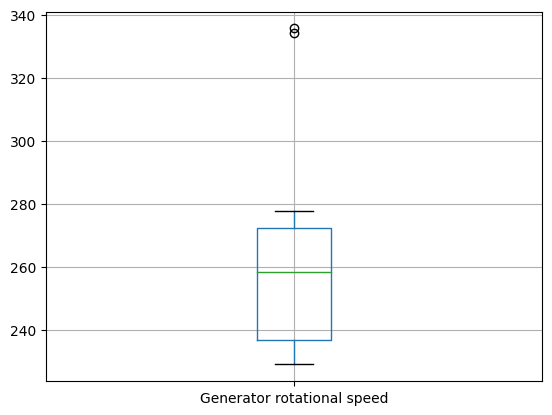

In [8]:
print('\nThe max RPM is ', max(df['Generator rotational speed']))
print('\nThe min RPM is ', min(df['Generator rotational speed']))

# show a box plot of the RPM data
df.boxplot(column=['Generator rotational speed'])



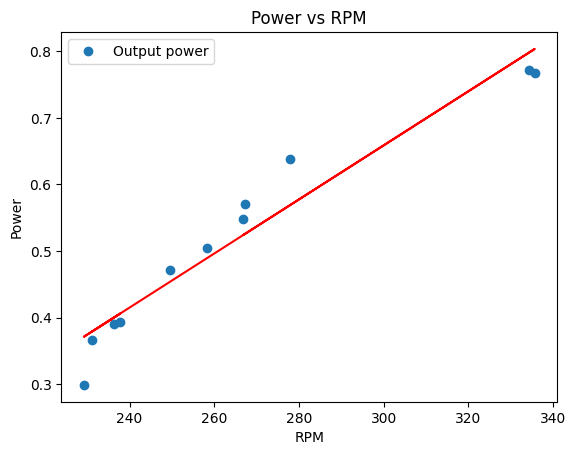

In [14]:
# plot the Power vs RPM
import matplotlib.pyplot as plt

df.plot(x='Generator rotational speed', y='Output power', style='o')
plt.title('Power vs RPM')
plt.xlabel('RPM')
plt.ylabel('Power')

# linear regression
import numpy as np
y = np.polyfit(df['Generator rotational speed'], df['Output power'], 1)
p = np.poly1d(y)
plt.plot(df['Generator rotational speed'], p(df['Generator rotational speed']), 'r-')
plt.show()

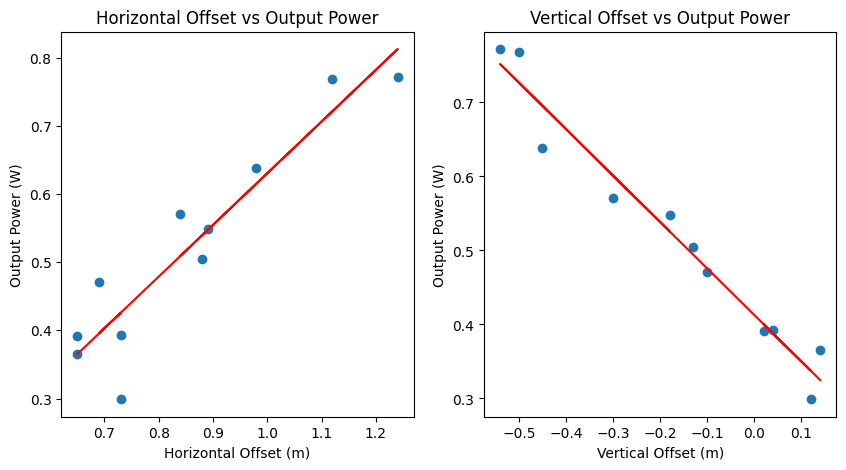

In [9]:
# plot the data - plot output power against horizontal and vertical offset

import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(df['Estimated horizontal offset'], df['Output power'])
ax[0].set_xlabel('Horizontal Offset (m)')
ax[0].set_ylabel('Output Power (W)')
ax[0].set_title('Horizontal Offset vs Output Power')

ax[1].scatter(df['Estimated vertical offset'], df['Output power'])
ax[1].set_xlabel('Vertical Offset (m)')
ax[1].set_ylabel('Output Power (W)')
ax[1].set_title('Vertical Offset vs Output Power')

# add a polynomial line of best fit
x = df['Estimated horizontal offset']
y = df['Output power']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax[0].plot(x, p(x), 'r-')

x = df['Estimated vertical offset']
y = df['Output power']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax[1].plot(x, p(x), 'r-')

plt.show()


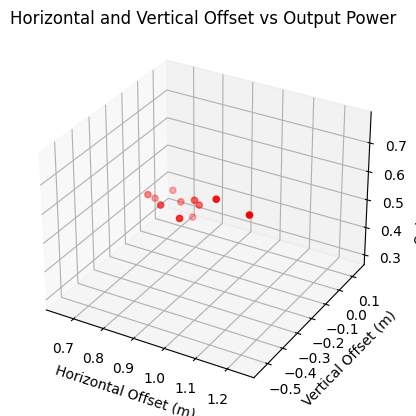

In [21]:
# plot the horizontal and vertical offset data against power output as a 3D surface plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Estimated horizontal offset'], df['Estimated vertical offset'], df['Output power'], c='r', marker='o')

ax.set_xlabel('Horizontal Offset (m)')
ax.set_ylabel('Vertical Offset (m)')
ax.set_zlabel('Output Power (W)')
ax.set_title('Horizontal and Vertical Offset vs Output Power')


plt.show()


